In [2]:
!pip install xlrd

# Importing pandas for data manipulation and analysis
import pandas as pd

# Importing numpy for numerical operations
import numpy as np

# Importing for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing metrics for evaluating the regression model
from sklearn.metrics import mean_squared_error, r2_score

# Importing function to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Importing  models
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings('ignore')

In [3]:
#looking at the data in jupyter notebook
df = pd.read_excel(r"C:\Users\kaohs\Desktop\Ironhack 2024\Project\My-mid-project\data files\regression_data.xls")
df


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [4]:
#Creating a copy to work on without changing the original dataset
df1=df.copy()

## CLEANING THE DATA 

In [5]:
# Checking for duplicate rows in the DataFrame
df1.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21597, dtype: bool

In [6]:
# Converting all column names to lowercase for consistency
df1.columns = df1.columns.str.lower()
# Displaying the column names to verify the changes
df1.columns


Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [7]:
# Calculating the percentage of missing data in each column
for col in df1.columns:
    no_data = np.mean(df1[col].isnull())
    print(col, no_data)

id 0.0
date 0.0
bedrooms 0.0
bathrooms 0.0
sqft_living 0.0
sqft_lot 0.0
floors 0.0
waterfront 0.0
view 0.0
condition 0.0
grade 0.0
sqft_above 0.0
sqft_basement 0.0
yr_built 0.0
yr_renovated 0.0
zipcode 0.0
lat 0.0
long 0.0
sqft_living15 0.0
sqft_lot15 0.0
price 0.0


In [8]:
# Displaying the data types of each column in the DataFrame
df1.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [9]:
#Dropping these columns since the purchase date and id might not influence the price of the house. 
df1.drop(['date', 'id'], axis=1, inplace=True)

In [10]:
#Check if it has been dropped. 
df1.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


## EDA 

<module 'matplotlib.pyplot' from 'C:\\Users\\kaohs\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

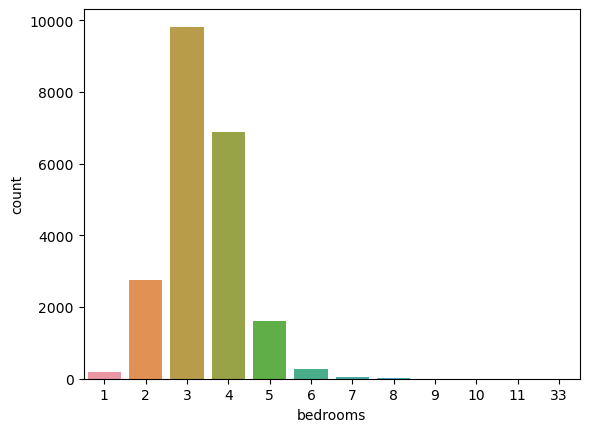

In [11]:
# Plotting the distribution of the number of bedrooms
sns.countplot(x='bedrooms', data=df1)
plt

Text(0.5, 1.0, 'Distribution of Bathrooms')

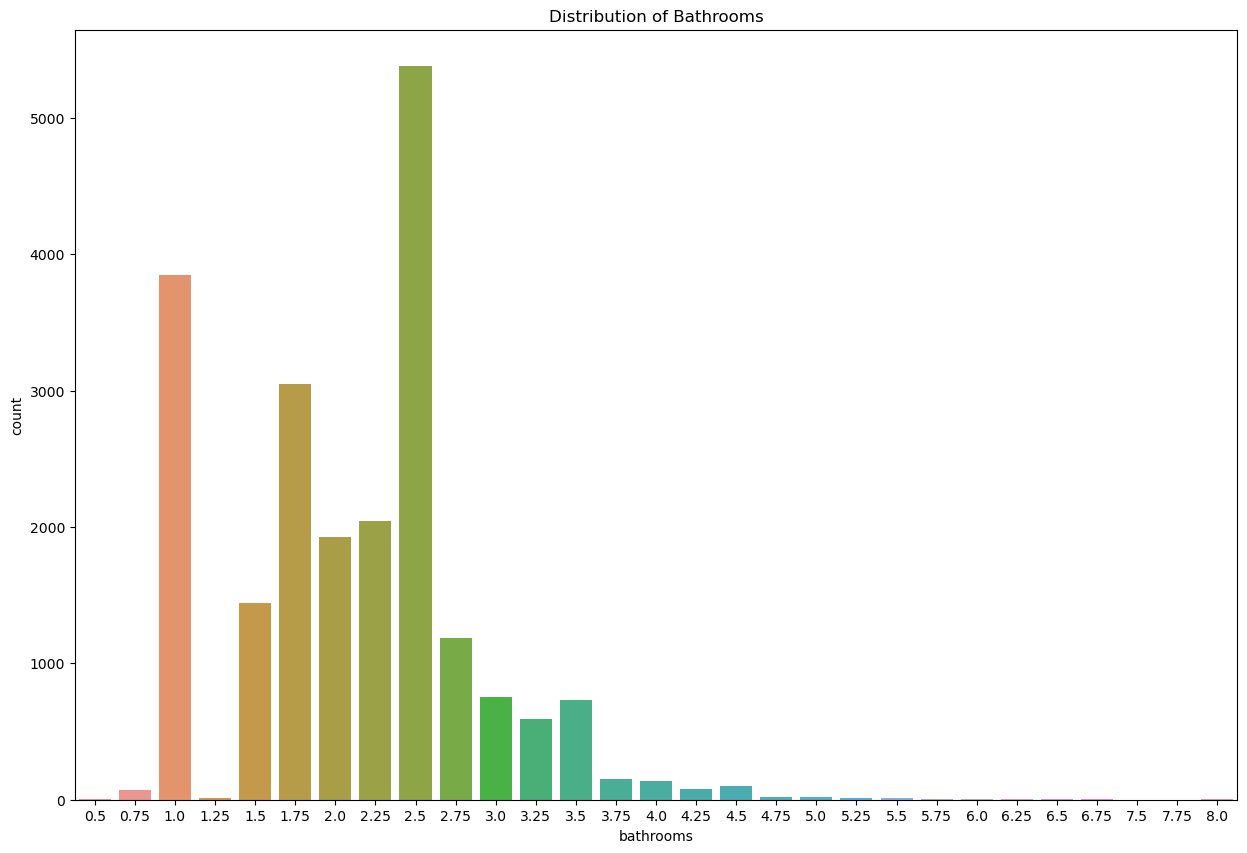

In [12]:
# Plotting the distribution of the number of bathrooms
plt.figure(figsize=(15,10))
sns.countplot(x='bathrooms', data=df1)
plt.title('Distribution of Bathrooms')



<function matplotlib.pyplot.show(close=None, block=None)>

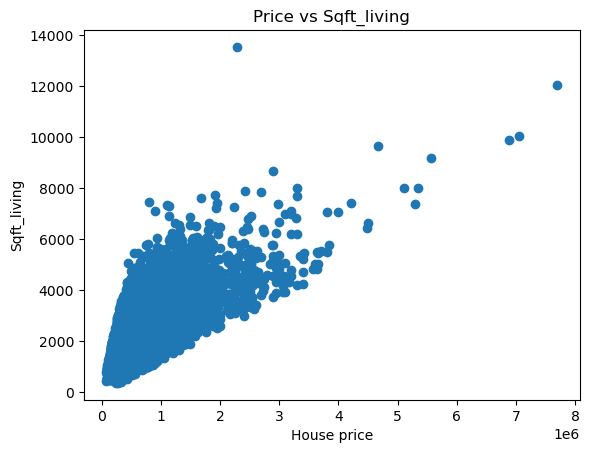

In [13]:
# Creating a scatter plot to visualize the relationship between house price and house size
plt.scatter(x=df1['price'], y=df1['sqft_living'])

plt.title ('Price vs Sqft_living')
plt.xlabel ('House price')
plt.ylabel ('Sqft_living')

plt.show

#Lets check for correlation

In [14]:
# Calculate the correlation matrix to understand relationships between features
correlation_matrix = df1.corr()
correlation_matrix


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.308787
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303,0.525906
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342,0.701917
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.089876
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.256804
waterfront,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781,0.266398
view,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904,0.397370
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.036056
grade,0.356563,0.665838,0.762779,0.114731,0.458794,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.447865,0.014261,-0.185771,0.113575,0.200341,0.713867,0.120981,0.667951
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,0.072109,0.167609,-0.158904,0.756073,1.000000,-0.052156,0.424037,0.023251,-0.261570,-0.001199,0.344842,0.731767,0.195077,0.605368


#There is a high correlation between the price of the houses and sqt living, grade and sqt above

In [15]:
# Sort the correlation values with respect to the 'price' column in descending order
correlation_with_price = correlation_matrix["price"].sort_values(ascending=False)
correlation_with_price


price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
zipcode         -0.053402
Name: price, dtype: float64

In [16]:
# The analysis shows that 'sqft_living', 'grade', and 'sqft_above' have the highest correlation with house prices.

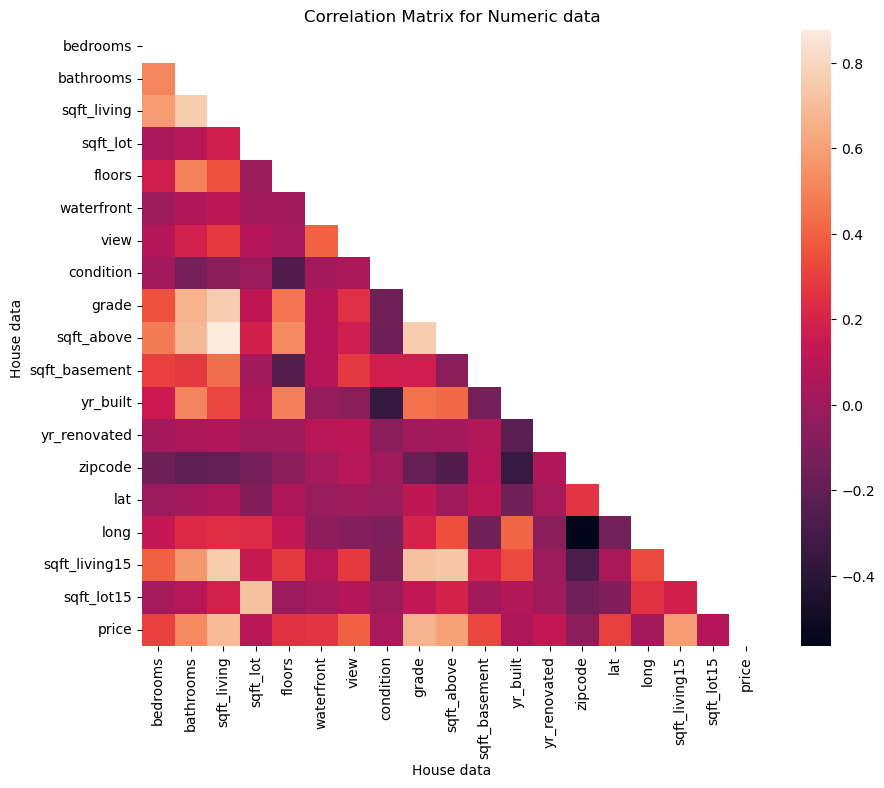

In [17]:
#Creating a heatmap for a better visual understanding of the correlation between the different features.
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True)

plt.title ('Correlation Matrix for Numeric data')
plt.xlabel ('House data')
plt.ylabel ('House data')

plt.show()

Machine learning 

In [18]:
# Drop the target variable 'price' from the feature set
X = df1.drop(['price'], axis=1)
y = df1['price']


Training and test data

In [19]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
y_train

753       699800
1418     1700000
8178      258000
2254      245000
4063      373000
          ...   
11964     440000
21575     572000
5390      299800
860       245000
15795     545000
Name: price, Length: 15117, dtype: int64

In [21]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train,y_train)


StandardScaler()

In [22]:
# Transform the training and test data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
# Display the scaled training data
X_train_scaled

array([[-1.51351430e+00,  4.93441619e-01,  3.17532221e-01, ...,
         1.37001239e+00, -1.74780007e-01, -2.30644728e-01],
       [ 6.86360288e-01,  2.11638165e+00,  1.19547337e+00, ...,
        -2.27291861e-01,  4.36651387e-01,  2.36581296e-02],
       [-4.13577004e-01,  4.93441619e-01, -3.86988457e-01, ...,
        -6.65490372e-01, -3.05801020e-01, -2.18475363e-01],
       ...,
       [ 6.86360288e-01, -8.04910403e-01, -6.03764051e-01, ...,
         2.16159679e+00, -6.84306169e-01, -1.60578686e-01],
       [-2.61345159e+00, -1.77867442e+00, -1.85022371e+00, ...,
        -7.71506140e-01, -1.19383233e+00,  7.91209338e-02],
       [ 6.86360288e-01,  4.93441619e-01,  7.23986458e-01, ...,
         1.75873687e+00,  1.20821957e+00, -8.64985315e-04]])

In [24]:
# Display the scaled test data
X_test_scaled

array([[-0.413577  , -1.77867442, -1.34080107, ..., -1.00474083,
        -1.65968482, -0.16493016],
       [-0.413577  , -1.45408641, -0.62544161, ..., -0.77857386,
        -0.69886406, -0.26339138],
       [ 0.68636029,  0.16885361, -0.32195578, ...,  3.32070253,
         0.10181991,  1.37327762],
       ...,
       [-0.413577  , -0.4803224 , -0.52789259, ...,  0.28158383,
        -0.58240094, -0.17532943],
       [ 1.78629758,  1.79179364,  0.72940585, ...,  0.3098547 ,
         0.8733881 , -0.30487786],
       [-1.5135143 , -0.4803224 , -1.1131867 , ...,  0.88233985,
        -0.29124313,  0.14358169]])

In [25]:
# Fit the linear regression model on the scaled training data
lm = LinearRegression()
lm.fit(X_train,y_train)

# Display the coefficients of the model
lm.coef_


array([-3.64595294e+04,  4.40562864e+04,  1.06537365e+02,  9.71521632e-02,
        1.00691216e+04,  6.05532332e+05,  5.08259550e+04,  2.85191133e+04,
        1.00612661e+05,  6.27400884e+01,  4.37972765e+01, -2.70108722e+03,
        2.03135591e+01, -5.63132976e+02,  5.82806043e+05, -2.08334931e+05,
        2.86185849e+01, -4.21471393e-01])

In [26]:
# Predict the target variable for the training data
X_train_prediction=lm.predict(X_train)


# Calculate the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R^2) for the training data
rmse = mean_squared_error(y_train, X_train_prediction, squared=False)
mae = mean_absolute_error(y_train, X_train_prediction)
r2_score= lm.score(X_train,y_train)

# Print the in-sample metrics
print("R2_score:", round(r2_score,2))
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.71
RMSE: 200048.81274097483
MAE: 126134.72939637428


In [27]:
# Fit the linear regression model on the test data
lm.fit(X_test,y_test)

# Display the coefficientof the model
lm.coef_


array([-3.39982519e+04,  3.48718260e+04,  1.18948558e+02,  2.07702416e-01,
       -1.83802682e+03,  5.21226291e+05,  5.77628640e+04,  2.22463658e+04,
        8.84639297e+04,  8.92294327e+01,  2.97191252e+01, -2.45107716e+03,
        1.76516874e+01, -6.29279594e+02,  6.44309631e+05, -2.32934945e+05,
        4.31691185e+00, -3.41074493e-01])

In [28]:
# Predict the target variable for the test data
X_test_prediction=lm.predict(X_test)

# Calculate the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R^2) for the test data

rmse = mean_squared_error(y_test, X_test_prediction, squared=False)
mae = mean_absolute_error(y_test, X_test_prediction)
r2_score= lm.score(X_test,y_test)

print("R2_score:", round(r2_score,2))
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.69
RMSE: 202903.59015170563
MAE: 125719.69167949815


Trying the KNN model 

In [30]:
# Import the KNeighborsClassifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the KNN classifier on the training data
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [31]:
# Predict the target variable for the test data using the KNN classifier
X_test_prediction = knn.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) for the test data
rmse = mean_squared_error(y_test, X_test_prediction, squared=False)
mae = mean_absolute_error(y_test, X_test_prediction)

# Calculate the R-squared (R^2) score for the test data
r2_score = knn.score(X_test, y_test)


print("R2_score:", round(r2_score, 2))
print("RMSE:", rmse)
print("MAE:", mae)


R2_score: 0.0
RMSE: 329172.9597153329
MAE: 195903.29938271604


In [41]:
# Predict the target variable for the training data using the KNN classifier
X_train_prediction=knn.predict(X_train)

# Calculate the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) for the training data
rmse = mean_squared_error(y_train, X_train_prediction, squared=False)
mae = mean_absolute_error(y_train, X_train_prediction)
r2_score= knn.score(X_train,y_train)

print("R2_score:", round(r2_score,2))
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.33
RMSE: 294795.2572636486
MAE: 149096.6679235298


Trying the Decision Tree model

In [33]:
# Import necessary libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
regressor.fit(X_train, y_train)



In [36]:
# Predict on the test set
X_test_prediction = regressor.predict(X_test)

# Calculate evaluation metrics for the test set
rmse = mean_squared_error(y_test, X_test_prediction, squared=False)
mae = mean_absolute_error(y_test, X_test_prediction)
r2_score= regressor.score(X_test,y_test)

print("R2_score:", round(r2_score,2))
print("RMSE:", rmse)
print("MAE:", mae)



R2_score: 0.69
RMSE: 201553.2583275289
MAE: 98567.57145061728


In [37]:
# Predict on the training set
X_train_prediction=regressor.predict(X_train)

# Calculate evaluation metrics for the training set
rmse = mean_squared_error(y_train, X_train_prediction, squared=False)
mae = mean_absolute_error(y_train, X_train_prediction)
r2_score= regressor.score(X_train,y_train)


print("R2_score:", round(r2_score,2))
print("RMSE:", rmse)
print("MAE:", mae)


R2_score: 1.0
RMSE: 8388.722315335806
MAE: 708.6678573791096


It seems that we are facing a problem of a data set that is being overfitted because with a R2 score of 1 it is unrealistic. Therefore we will control the dept of the tree.

In [38]:
# Initialize the Decision Tree Regressor with specified parameters
regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)

# Fit the model on the training data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)

In [39]:
# Predict on the test set
X_test_prediction = regressor.predict(X_test)

# Calculate evaluation metrics for the test set
rmse = mean_squared_error(y_test, X_test_prediction, squared=False)
mae = mean_absolute_error(y_test, X_test_prediction)
r2_score= regressor.score(X_test,y_test)

print("R2_score:", round(r2_score,2))
print("RMSE:", rmse)
print("MAE:", mae)


R2_score: 0.71
RMSE: 195924.41512500952
MAE: 113762.72459995508


In [40]:
# Predict on the training set
X_train_prediction=regressor.predict(X_train)

# Calculate evaluation metrics for the training set
rmse = mean_squared_error(y_train, X_train_prediction, squared=False)
mae = mean_absolute_error(y_train, X_train_prediction)
r2_score= regressor.score(X_train,y_train)

print("R2_score:", round(r2_score,2))
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.76
RMSE: 180472.4400393299
MAE: 110281.92859969632


In this specific case, the Decision Tree model appears to be the best choice for prediction.The Decision Tree model’s performance metrics (e.g., RMSE, MAE, R² score) indicate that it can effectively model the data without overfitting, especially when parameters like maximum depth and minimum samples per split are appropriately set.